In [1]:
import numpy as np
import pandas as pd
import ast  # Import ast module for safe evaluation of literals
import matplotlib.pyplot as plt


CONSISTENCY BETWEEN DEFINITIONS

In [2]:
model = 'Mistral' #LLama3 - Mistral - Flant5
ds = 'mhs' #HC - FtW - mhs
step = '1' # 1 - 2


root = f"../Outputs/{model}_{ds}_step"

csv_file_path = root + step + '.csv'

    
df = pd.read_csv(str(csv_file_path))

# Read the CSV file into a DataFrame
id_def = df['ID_def'].tolist()
Inputs_lists = df['Input'].apply(eval).tolist()
Predictions_list = df['Predictions'].apply(eval).tolist()
Labels_list = df['Labels'].apply(eval).tolist()

In [3]:
first = []
second = []
third = [] 

k = 0
if step == '1' :
    k = 33
elif step == '2':
    k = 24
else:
    k = 33
 
k = int(k /3) # total number of runs / number of runs for each definiton = 33/3 = 11


for i in range(3):
    m = i
    for j in range(k):
        if i == 0:
            first.append(Predictions_list[m])
            m +=3
        elif i == 1:
            second.append(Predictions_list[m])
            m +=3
        else:
            third.append(Predictions_list[m])
            m +=3

lists = []
lists.append(first)
lists.append(second)
lists.append(third)

In [4]:
num_sublists = len(first)
sublist_length = len(first[0])

xs = []
for i,l in enumerate(lists): 
   
    lista_x = l
    c = 0 #consistent counter

    for element in range(sublist_length):
        d = 0  
        for lista in range(num_sublists - 1):
            if lista_x[lista][element] == lista_x[lista + 1][element]:
                d += 1  
        if d >= num_sublists - 1:
            c += 1  

    #print(f"Number of fully consistent elements across all sublists in run {i+1} : {c}")

    x = ((c*100)/sublist_length)
    #print(f"Run{i+1}")
    xs.append(x)
    print(round(x, 2))

xs_array = np.array(xs)

# Calculate the average
average = np.mean(xs_array)

# Calculate the standard deviation
std_dev = np.std(xs_array)

print(f"Average: {round(average, 2)}")
print(f"Standard Deviation: {round(std_dev, 2)}")

84.82
84.85
84.85
Average: 84.84
Standard Deviation: 0.01


In [5]:
import math  # Import math module to check for NaN

# Determine the number of sublists and sublist length
num_sublists = len(lista_x) # 11
sublist_length = len(lista_x[0])  # 3901

lista_x = first  #choose which run

c = 0  # Initialize to count for fully consistent elements across all sublists
nan_list = []
id_list = [] #with which definition is incosistent? #inconsistent elements
list_id = [] #with which definition is more consistent? # consistent elements
# Iterate over each element index (assuming all sublists are of the same length)
if step == '1':
    id_deff = ['NO','Own','OL','HSB','HSB_EDFoC', 'HSB_EDPC','HSB_EDT', 'HSB_EDFoC_EDT', 'HSB_EDFoC_EDPC', 'HSB_EDT_EDPC','HSB_EDFoC_EDPC_EDT']
elif step == '2':
    id_deff = ["+LAA","+LAA_PI","+LAA_Exc","+LAA_IHS","+LAA_PI_Exc","+LAA_Exc_IHS","+LAA_PI_IHS","+LAA_PI_IHS_Exc"]
multi_list = [] #keeps track of a data point and with which definition was not consistent
for element in range(sublist_length): 
    d = 0  # counter for consistent comparisons at the current element index
    for ind, lista in enumerate(range(num_sublists - 1)):
        if lista_x[lista][element] == lista_x[lista + 1][element]:
            d += 1  # Increment the counter if the elements match between consecutive sublists
            list_id.append(id_deff[ind])
            if ind == 9:
                list_id.append(id_deff[ind+1])
        else:
            nan_list.append(Inputs_lists[lista][element]) #append the non-consistent input
            id_list.append(id_deff[ind]) #append the non-consistent definition
            multi_list.append((Inputs_lists[lista][element],id_deff[ind]))
            if ind == 9:
                nan_list.append(Inputs_lists[lista+1][element])
                id_list.append(id_deff[ind+1]) # + 1 to capture elements of the last list
                multi_list.append((Inputs_lists[lista+1][element],id_deff[ind+1]))

             
    
    #Check if all consecutive comparisons at the current element index are consistent
    if d == num_sublists - 1:
        c += 1 

print(f"Number of fully consistent elements across all sublists: {c}")

print('Number of incoherent elements: ',len(id_list))
print('Number of coherent elements: ',len(list_id))



Number of fully consistent elements across all sublists: 3309
Number of incoherent elements:  1703
Number of coherent elements:  41208


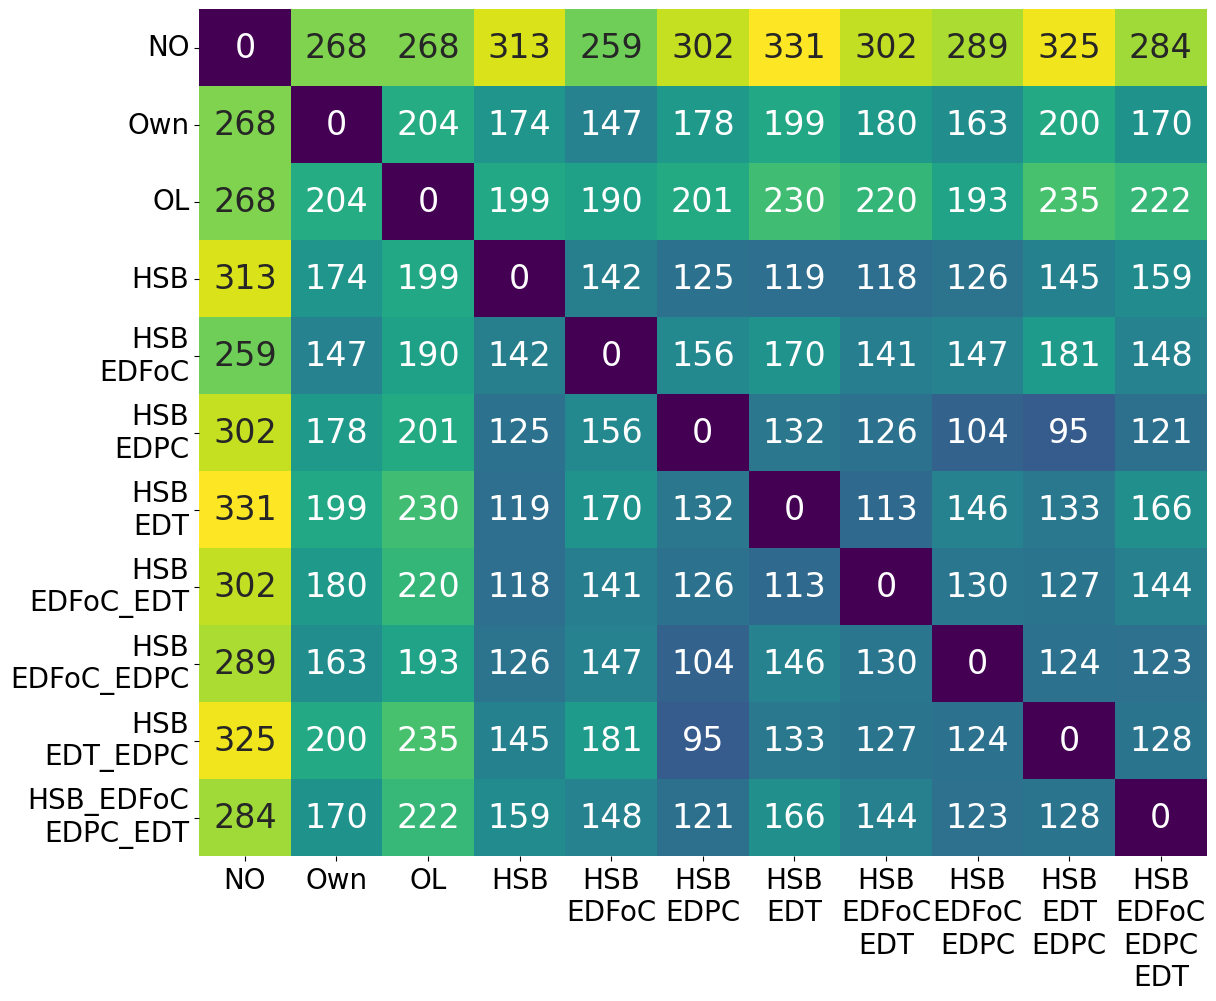

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def compute_confusion_matrix(data, sublist_count):
    n = sublist_count
    confusion_matrix = np.zeros((n, n), dtype=int)

    for i in range(n):
        for j in range(i + 1, n):  
            non_matches = sum(1 for k in range(len(data[0])) if data[i][k] != data[j][k])
            confusion_matrix[i, j] = non_matches
            confusion_matrix[j, i] = non_matches

    return confusion_matrix

# Assuming id_deff is the list of sublist names and already defined as shown earlier
n = len(id_deff)

# Compute confusion matrices for each dataset
confusion_matrix_first = compute_confusion_matrix(first, n)
confusion_matrix_second = compute_confusion_matrix(second, n)
confusion_matrix_third = compute_confusion_matrix(third, n)

# Calculate the average of the matrices
average_confusion_matrix = (confusion_matrix_first + confusion_matrix_second + confusion_matrix_third) / 3

# Set the diagonal to zero
np.fill_diagonal(average_confusion_matrix, 0)

# Define a colormap where the first color is black for the diagonal
colors = ['black'] + sns.color_palette("viridis", n_colors=256).as_hex()
cmap = ListedColormap(colors)

# Define the color boundaries
boundaries = [0] + list(np.linspace(np.min(average_confusion_matrix), np.max(average_confusion_matrix), num=256))
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Plotting
fig, ax = plt.subplots(figsize=(13, 11))
sns.heatmap(
    average_confusion_matrix,
    annot=True,
    fmt=".0f",
    cmap=cmap,
    norm=norm,
    xticklabels=id_deff,
    yticklabels=id_deff,
    ax=ax,
    cbar=False,  # Disable the color bar
    annot_kws={"size": 24}
)

if step == '1':
    personalized_labels = ['NO','Own','OL','HSB','HSB\nEDFoC', 'HSB\nEDPC','HSB\nEDT', 'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC','HSB\nEDFoC\nEDPC\nEDT']
    
    personalized_y_labels = ['NO', 'Own', 'OL', 'HSB', 'HSB\nEDFoC', 
                             'HSB\nEDPC', 'HSB\nEDT', 'HSB\nEDFoC_EDT', 
                             'HSB\nEDFoC_EDPC', 'HSB\nEDT_EDPC', 
                             'HSB_EDFoC\nEDPC_EDT']
else:
    personalized_labels = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI\nExc","+LAA\nExc\nIHS","+LAA\nPI\nIHS","+LAA\nPI\nIHS\nExc"]
    
    personalized_y_labels = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI_Exc","+LAA\nExc_IHS","+LAA\nPI_IHS","+LAA_PI\nIHS_Exc"]

# Set custom x-axis labels and force the newlines
ax.set_xticklabels(personalized_labels, fontsize=20, rotation=0)

# Set custom y-axis labels and force the newlines
ax.set_yticklabels(personalized_y_labels, fontsize=20)

# Save the plot
fig.savefig(f"../Figures/Average_Confusion_Matrix_{model}_{ds}_step_{step}.pdf", bbox_inches='tight')

# Show the plot
plt.show()


CONSISTENCY WITHIN DEFINITIONS

In [7]:
model = 'Flant5' #LLama3 - Mistral - Flant5
ds = 'HC' #HC - FtW - mhs
step = '2' # 1 - 2

root = f"../Outputs/{model}_{ds}_step"

csv_file_path = root + step + '.csv'
if step == '1' :
    k = 33
elif step == '2':
    k = 24
    
df = pd.read_csv(str(csv_file_path))
    
    
id_def = df['ID_def'].tolist()
Predictions_list = df['Predictions'].apply(eval).tolist()
Labels_list = df['Labels'].apply(eval).tolist()



In [8]:
def count_consistent_elements(list_a, list_b):
    return sum(1 for a, b in zip(list_a, list_b) if a == b)


def count_consistent_elements2(list_a, list_b):
    return sum(1 for a, b in zip(list_a, list_b) if a == b and a != 'NaN' and b != 'NaN')

aaa=[]
n = 0

risultati = []

for i in range(len(set(id_def))):
    list1 = Predictions_list[n]
    list2 = Predictions_list[n+1]
    list3 = Predictions_list[n+2]

    consistent_pairs_count1 = 0
    consistent_pairs_count2 = 0
    consistent_pairs_count3 = 0
    consistent_triplets_count = 0

    consistent_pairs_count1 += count_consistent_elements2(list1, list2)
    consistent_pairs_count2 += count_consistent_elements2(list1, list3)
    consistent_pairs_count3 += count_consistent_elements2(list2, list3)

    consistent_triplets_count = sum(1 for a, b, c in zip(list1, list2, list3) if a == b == c and  a != 'NaN' and b != 'NaN' and c != 'NaN')

    
    if step == '1':
        id_deff = ['NO','HateCheck','OL','HSB','HSB_EDFoC', 'HSB_EDPC','HSB_EDT', 'HSB_EDFoC_EDT', 'HSB_EDFoC_EDPC', 'HSB_EDT_EDPC','HSB_EDFoC_EDPC_EDT']
    elif step == '2':
        id_deff = ["+LAA","+LAA_PI","+LAA_Exc","+LAA_IHS","+LAA_PI_Exc","+LAA_Exc_IHS","+LAA_PI_IHS","+LAA_PI_IHS_Exc"]
        
    tot = len(Labels_list[0])
    #print('Definition: ',id_def[n+2])
    #print(n)
    per1 = consistent_pairs_count1/tot
    #print("Number of consistent elements between list1 and list2:", consistent_pairs_count1, "Percentage: ",per1)
    per2 = consistent_pairs_count2/tot
    #print("Number of consistent elements between list1 and list3:", consistent_pairs_count2,"Percentage: ",per2)
    per3 = consistent_pairs_count3/tot
    #print("Number of consistent elements between list2 and list3:", consistent_pairs_count3,"Percentage: ",per3)
    per4 = consistent_triplets_count/tot
    #print(per4)
    per4 = per4*100
    aaa.append(round(per4, 2))
    #print("Number of consistent elements among all three lists:", consistent_triplets_count,"Percentage: ",per4)
    
    risultati.append({'id_def':id_def[n+2] ,'cons12':per1,'cons13':per2,'cons23':per3,'cons_all':per4})

    n += 3
 

In [9]:
def detect_outliers_iqr(data):
    """
    Detects outliers in a list of numbers using the IQR method.
    
    Parameters:
        data (list): A list of numerical values.
        
    Returns:
        list: Outliers in the dataset.
    """
    if len(data) < 2:
        raise ValueError("The dataset must contain at least two values.")
    
    data_sorted = sorted(data)
    
    #calculate Q1 (25th percentile) and Q3 (75th percentile)
    n = len(data_sorted)
    q1_index = n // 4
    q3_index = (3 * n) // 4
    Q1 = data_sorted[q1_index]
    Q3 = data_sorted[q3_index]
    
    #compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    #determine the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers

outliers = detect_outliers_iqr(aaa)
print(f"Outliers: {outliers}")


Outliers: [76.19]


In [12]:
df = pd.DataFrame(risultati)

csv_file_path = 'Analysis_results/' + model +  '_consistency_' + 'step' + step + '.csv'

df.to_csv(csv_file_path, index=False) 